Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Big Data and Analytics
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Prelim Exam** | **Group 5**
**Name** | Antenor, Francis Gabrielle <br> <br> Dela Cruz, Marc Kevin
**Section** | CPE32S5
**Date Performed**: | March 10, 2024
**Date Submitted**: | March 10, 2024
**Instructor**: |Engr. Roman M. Richard

<hr>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree  import DecisionTreeClassifier
from sklearn.tree import plot_tree


path = "/content/advertising (2).csv"

advertising = pd.read_csv(path)
advertising.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data = pd.DataFrame(advertising)

In [ ]:
data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.tail()

,ID,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
dummies = pd.get_dummies(data)
dummies

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Linear Regression
### Singular Linear Regression

In [ ]:
x = data[['TV']]
y = data ['Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_score = model.score(x_train, y_train)
train_score

0.5911667812043272

In [ ]:
train_scores = model.score(x_train, y_train)
train_scores

0.05658396829234358

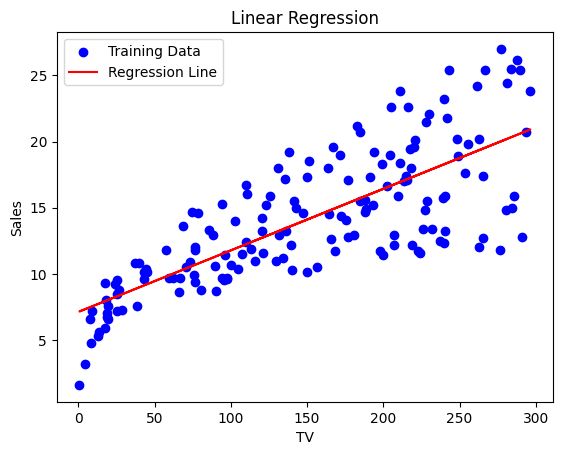

In [ ]:
y_pred = model.predict(x_test)
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train, model.predict(x_train), color='red', label='Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared", r_squared)

Mean Squared Error: 10.204654118800956
R-squared 0.6766954295627076


### Multiple Linear Regression

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree  import DecisionTreeClassifier
from sklearn.tree import plot_tree


path = "/content/advertising (2).csv"

df = pd.read_csv(path)
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df= df.drop(['ID'], axis = 1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.corr()['Sales']

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

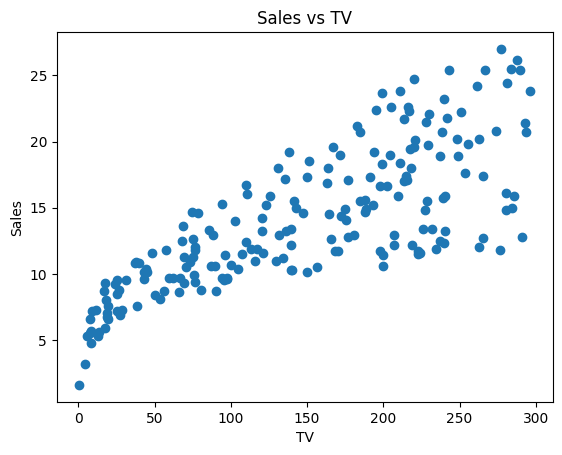

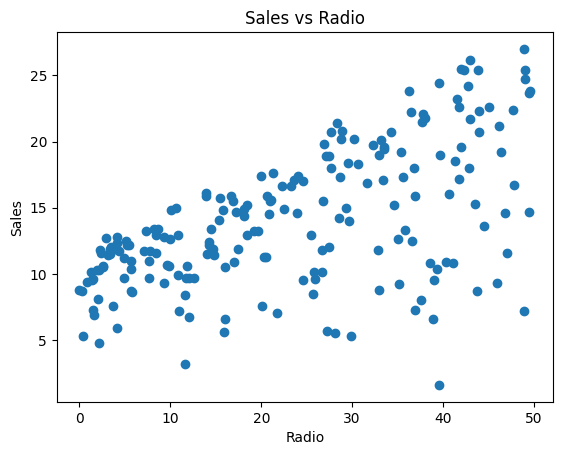

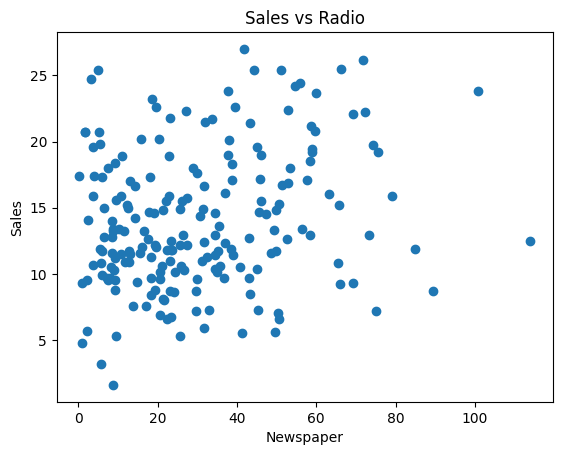

In [7]:
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")
plt.show()

plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")
plt.show()

plt.scatter(df["Newspaper"], df["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Radio")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

reg = LinearRegression()
reg.fit(x,y)

list(zip(['TV', 'Radio', 'Newspaper'], reg.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

<Axes: >

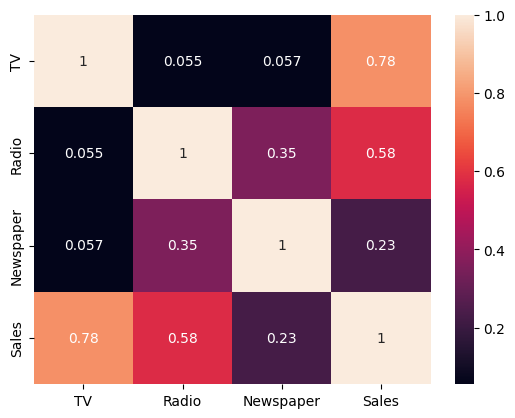

In [9]:
sns.heatmap(df.corr(), annot=True)

###Polynomial Linear Regression

In [10]:
X = df[['TV']]
y = df['Sales']
degree = 2

In [11]:
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [12]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [13]:
y_pred = model.predict(X_poly)

In [14]:
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
print('R-squared:', r2_score(y, y_pred))

Mean Squared Error: 10.31866303025246
R-squared: 0.6190371168872755


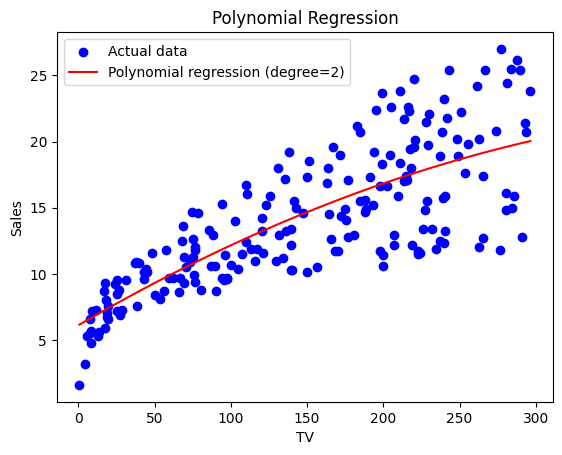

In [15]:
plt.scatter(X, y, color='blue', label='Actual data')
X_sorted, y_pred_sorted = zip(*sorted(zip(X.values, y_pred)))
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial regression (degree=' + str(degree) + ')')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Polynomial Regression')
plt.legend()

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

#Converting Continuous variable into binary
df['Sales_High'] = (df['Sales'] > df['Sales'].mean()).astype(int)

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales_High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[24  1]
 [ 0 15]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [17]:
df.head()

,TV,Radio,Newspaper,Sales,Sales_High
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,0
2,17.2,45.9,69.3,9.3,0
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,0


In [18]:
model_LR = LogisticRegression(C=10)
model_LR.fit(X_train,y_train)

LogisticRegression(C=10)

In [19]:
score_LR_train = model_LR.score(X_train,y_train)
print(f"Train accuracy: {score_LR_train}")

Train accuracy: 0.94375


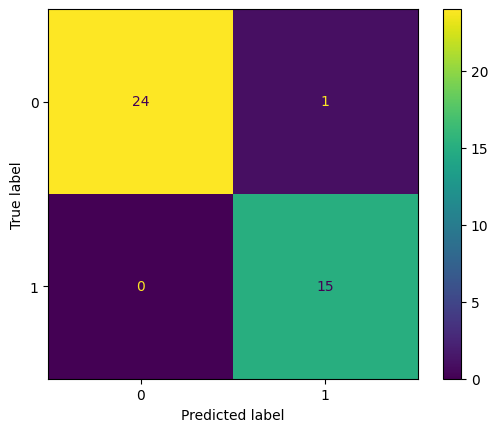

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_LR,X_test,y_test);

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd

columns = ["TV", "Radio", "Newspaper"]
x_input = data[list(columns)].values
y_target = data['Sales'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.2, random_state=42)

regressor_train = DecisionTreeRegressor(random_state=0)
regressor_train.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
predictions_test = regressor_train.predict(x_test)

In [ ]:
test_score = r2_score(y_test, predictions_test)
print("Test Score:", test_score)

Test Score: 0.9309964506180479


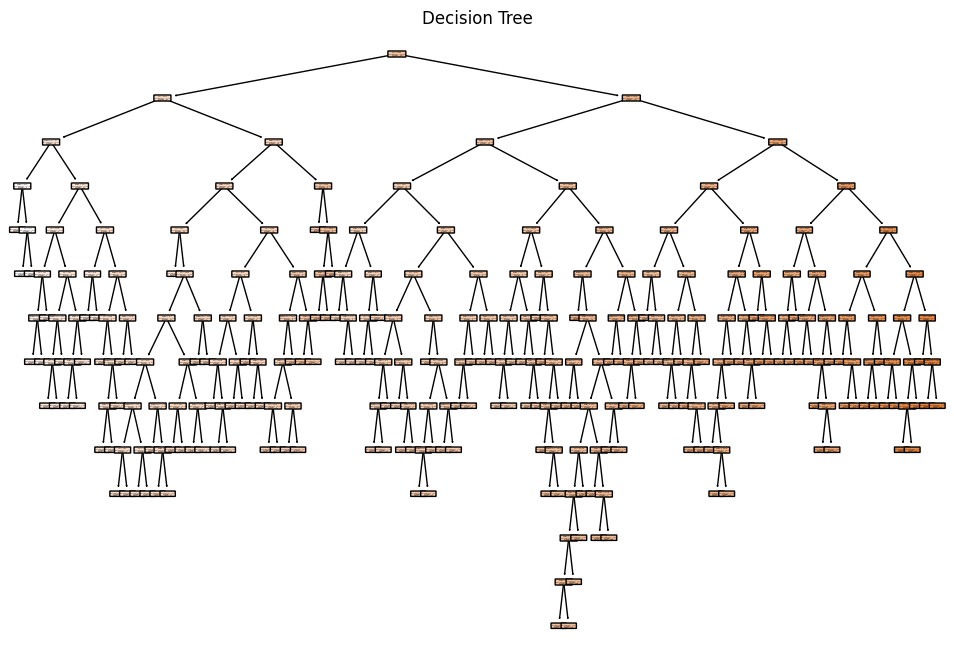

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(regressor_train, feature_names=columns, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
train_score = str(regressor_train.score(x_train, y_train))
test_score = str(regressor_train.score(x_test, y_test))
print('Training score = ' + train_score + ', Testing score = ' + test_score)

Training score = 1.0, Testing score = 0.9309964506180479


## Random Forest

In [ ]:
corr = data.corr()
corr.sort_values(['Sales'], ascending=False, inplace=True)
corr.Sales.head(5)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
ID          -0.051616
Name: Sales, dtype: float64

In [ ]:
x = data[['TV','Radio','Newspaper']]
y = data['Sales']

y = pd.cut(y, bins=3, labels=['low', 'medium', 'high'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classifcation Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  1]
 [ 0 11  0]
 [ 0  0 18]]
Classifcation Report:
              precision    recall  f1-score   support

        high       1.00      0.91      0.95        11
         low       1.00      1.00      1.00        11
      medium       0.95      1.00      0.97        18

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.98        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
model_RFC = RandomForestClassifier(n_estimators=10)
model_RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
score_RFC_train = model_RFC.score(x_train,y_train)
print(f"Train accuracy: {score_RFC_train}")

Train accuracy: 1.0


In [ ]:
score_RFC_test = model_RFC.score(x_test,y_test)
print(f"Test accuracy: {score_RFC_test}")

Test accuracy: 0.925


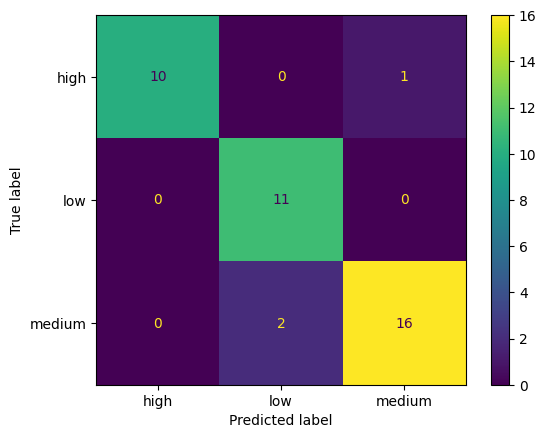

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_RFC,x_test,y_test);

### Evaluation Report

* Singular Linear Regression - As you can see in the graph it shows two independent variable where the x is TV and the Y is Sales which it shows a scatter plot and gets a linearity on TV and Sales, with this we can also know that the sales are increasing with TV.

* Multiple Linear Regression - This form of linear regression represents the association between two or more variables in the data. When the training data and regression line are visualized using the graph, a scatter is created. We can see on the heatmap that the closest correlations to the sales are TV and radio, while the newspaper is the weaker correlation.

* Polynomial Linear Regression - Based on this algo. The model appears to have decent predictive performance. The Mean Squared Error(10.31866303025246) is minimal, indicating that the model's predictions are fairly close to the actual values. The R-squared value(0.6190371168872755) indicates that the model accounts for a considerable percentage of the variability in the target variable.

* Logistic Regression - Logistic regression evaluates the likelihood of an event occurring based on the dataset. Based on the results, it can be concluded that the model is accurate for this dataset. Because it achieves greater than 90% accuracy for both test and training data.

* Decision Tree - In this decision tree we used regressor that gets the continuous value, in the dataset it shows that it is unaccurate and only having below 10% accuracy.

* Random Forest - This random forest consist of multiple decision trees that can help it have accurate reading and after using this we got a accuracy of 90% which is more effective that other models.

